In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [3]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-15-16/Ba_tirf_test

/Users/austinmcdonald/Desktop/data/Fluo4/8-15-16/Ba_tirf_test


In [4]:
os.listdir()

['Ba-P205-40s.csv', 'NoBa-P205-40s.csv']

In [17]:
sig1 = pd.read_csv('Ba-P205-40s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
sig0 = pd.read_csv('NoBa-P205-40s.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
sig1['signal'] = sig1['sig']-sig0['sig']


In [18]:
sig1['dif'] = sig1['sig'].diff().abs()

sig0['dif'] = sig0['sig'].diff().abs()


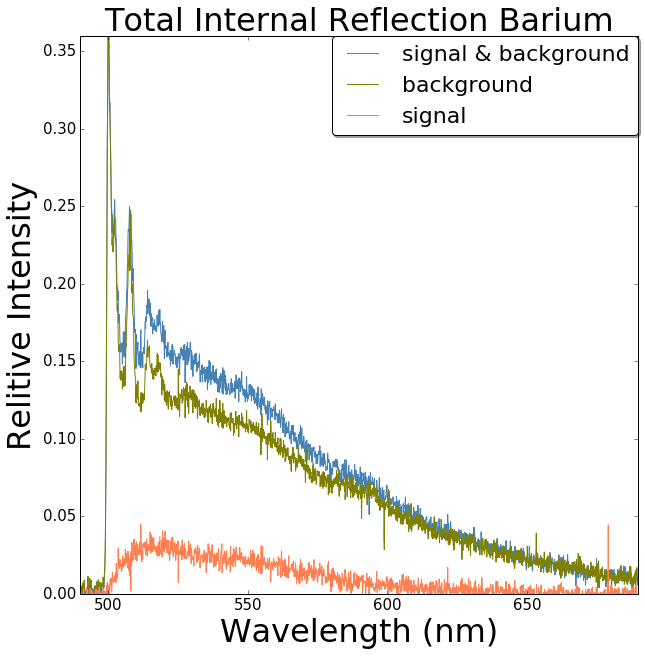

In [39]:
plt.figure(figsize=(10,10))

sig1f = sig1[sig1['dif']<.09]
sig0f = sig0[sig0['dif']<.09]

plt.plot(sig1f['wave'],sig1f['sig'],color='steelblue',label='signal & background')
plt.plot(sig0f['wave'],sig0f['sig'],color='olive',label='background')
plt.plot(sig1f['wave'],sig1f['signal'],color='coral',label='signal')


plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Total Internal Reflection Barium', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

plt.xlim(490,690)
plt.ylim(0,.36)
plt.tick_params(labelsize=15)

#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Ba TIRT.pdf')

plt.show()

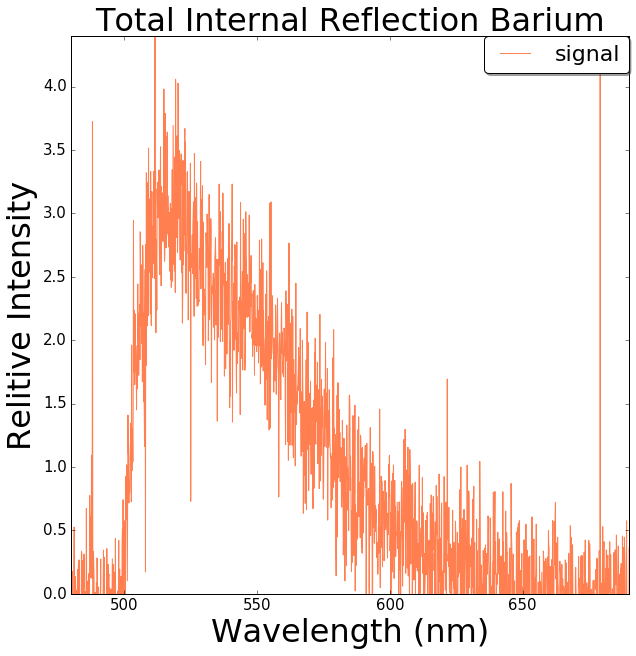

In [38]:
plt.figure(figsize=(10,10))

sig1f = sig1[sig1['dif']<.09]
sig0f = sig0[sig0['dif']<.09]

#plt.plot(sig1f['wave'],sig1f['sig'],color='steelblue',label='signal & background')
#plt.plot(sig0f['wave'],sig0f['sig'],color='olive',label='background')
plt.plot(sig1f['wave'],sig1f['signal']*100,color='coral',label='signal')


plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Total Internal Reflection Barium', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)

plt.xlim(480,690)
plt.ylim(0,4.4)
plt.tick_params(labelsize=15)

#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Ba TIR.pdf')

plt.show()